In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.sample(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
163543,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,4.0,1.0
195958,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,6.0
188800,0.0,1.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,10.0,0.0,0.0,1.0,9.0,4.0,8.0
156708,0.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,7.0
25663,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
71618,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0,4.0
252822,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0
74260,0.0,0.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
148524,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
27896,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,2.0,2.0,0.0,0.0,6.0,6.0,8.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


In [ ]:
df[['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]=df[['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
df.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


In [ ]:
df.duplicated().sum()

np.int64(23899)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(229781, 22)

In [ ]:
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


# WITHOUT SCALING LOGISTICS REGRESSION PERFORMANCE

In [ ]:
X=df[['GenHlth','PhysHlth','Age','BMI','HighBP']]
y=df['HeartDiseaseorAttack']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# ✅ 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# ✅ 3. Logistic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.897295297778358

# WITH SCALING LOGISTICS REGRESSION PERFORMANCE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Full feature and target datasets
X=df[['GenHlth','PhysHlth','Age','BMI','HighBP']]   # or all your features
y=df['HeartDiseaseorAttack'] # your target column

# 1. Train-test split first
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Apply scaling after split
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
model = LogisticRegression()
model.fit(X_train_scaled,y_train)


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test_scaled)

In [ ]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.897295297778358

In [ ]:
# 5. Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
# Optional: More Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.897295297778358

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     41269
           1       0.46      0.04      0.08      4688

    accuracy                           0.90     45957
   macro avg       0.68      0.52      0.51     45957
weighted avg       0.86      0.90      0.86     45957

Confusion Matrix:
[[41041   228]
 [ 4492   196]]


In [ ]:
clf = RandomForestClassifier(class_weight='balanced',random_state=42)
clf.fit(X_train, y_train)

# 4. Make Predictions
y_pred=clf.predict(X_test)

In [ ]:
# 5. Evaluate the Model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Optional: More Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     41269
           1       0.22      0.56      0.31      4688

    accuracy                           0.75     45957
   macro avg       0.58      0.67      0.58     45957
weighted avg       0.87      0.75      0.79     45957

Confusion Matrix:
[[31762  9507]
 [ 2049  2639]]


In [ ]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# lr = LogisticRegression()
# sel = EFS(lr, max_features=3, scoring='accuracy', cv=5)

In [ ]:
# model = sel.fit(x_train_scaled,y_train_scaled)

In [ ]:
# model.best_feature_names_

In [ ]:
# lr = LinearRegression()

# exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

# sel = exh.fit(X_train, y_train)

In [ ]:
df[['HeartDiseaseorAttack','HighBP','HighChol','Diabetes']].corr()

,HeartDiseaseorAttack,HighBP,HighChol,Diabetes
HeartDiseaseorAttack,1.000000,0.201271,0.176279,0.170816
HighBP,0.201271,1.000000,0.284186,0.261976
HighChol,0.176279,0.284186,1.000000,0.203327
Diabetes,0.170816,0.261976,0.203327,1.000000


In [ ]:
df['HeartDiseaseorAttack'].value_counts(normalize=True)*100

,proportion
HeartDiseaseorAttack,
0,89.678433
1,10.321567


In [ ]:
# now all data is of type of numerical so we will plot distribution and box plot and histplot for each


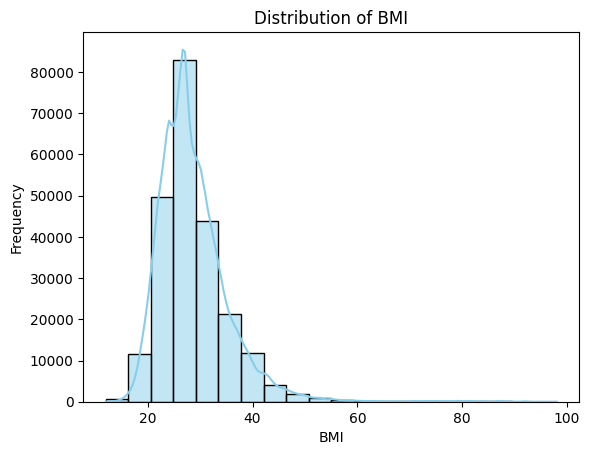

In [ ]:
# sns.histplot(df['BMI'],bin=30)  # kde=True adds a kernel density estimate
sns.histplot(df['BMI'], bins=20, kde=True, color='skyblue', edgecolor='black')
# df['BMI'].hist()
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-196-2877334558.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

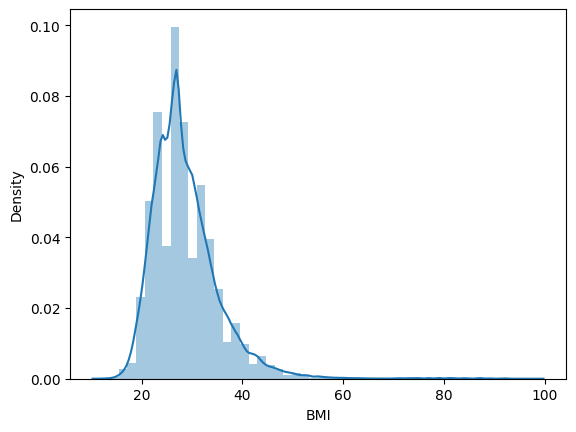

In [ ]:
sns.distplot(df['BMI'])


<Axes: >

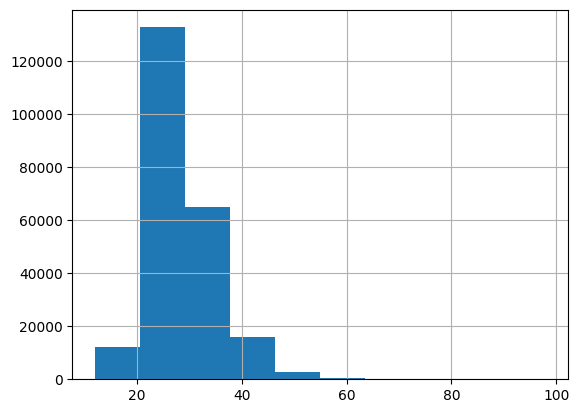

In [ ]:
df['BMI'].hist()

<Axes: xlabel='Age'>

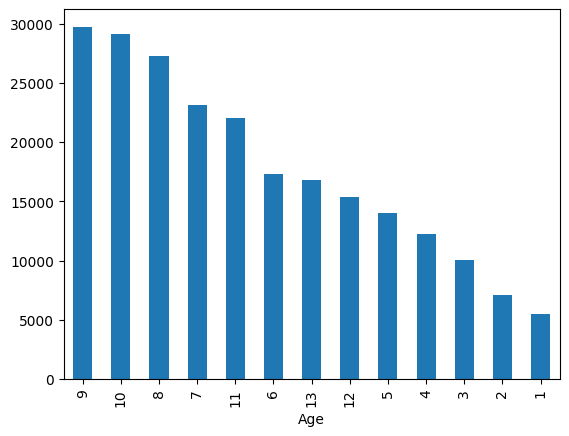

In [ ]:
df['Age'].value_counts().plot(kind='bar')

<Axes: xlabel='HeartDiseaseorAttack', ylabel='BMI'>

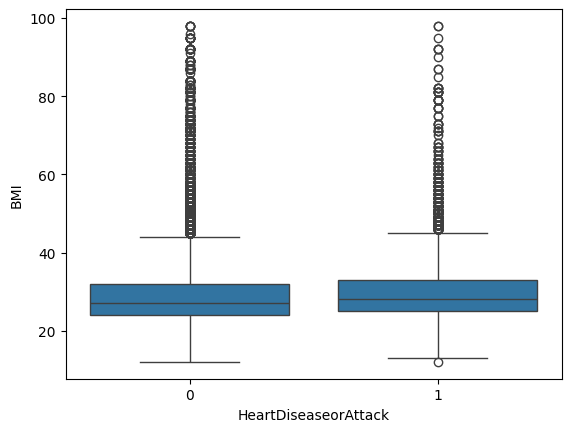

In [ ]:
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=df)

<Axes: xlabel='Smoker', ylabel='count'>

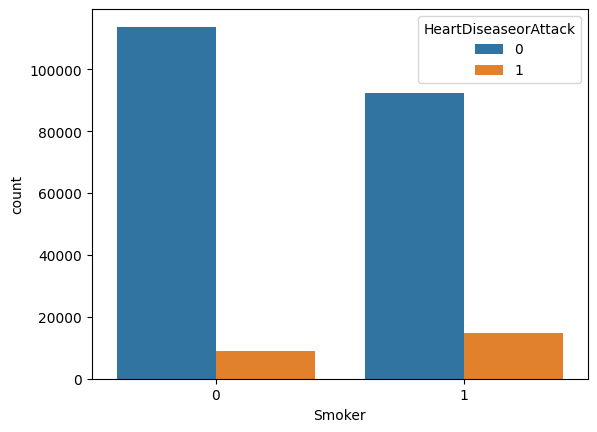

In [ ]:
sns.countplot(x='Smoker', hue='HeartDiseaseorAttack', data=df)

In [ ]:
corr=df.corr()
corr

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,0.170816,-0.073267,-0.007128,...,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,-0.082466,-0.122908
HighBP,0.201271,1.000000,0.284186,0.111220,0.194126,0.074237,0.124426,0.261976,-0.104131,-0.019329,...,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,-0.112676,-0.139782
HighChol,0.176279,0.284186,1.000000,0.094753,0.089615,0.074627,0.089258,0.203327,-0.063266,-0.026125,...,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,-0.049838,-0.061871
CholCheck,0.049995,0.111220,0.094753,1.000000,0.042420,-0.003776,0.027894,0.075701,-0.004409,0.017973,...,0.115539,-0.054198,0.062782,-0.001549,0.040612,0.048969,-0.024255,0.095996,-0.009758,0.002161
BMI,0.039926,0.194126,0.089615,0.042420,1.000000,-0.009196,0.011062,0.212027,-0.127864,-0.067528,...,-0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,-0.049347,-0.074568,-0.069192
Smoker,0.105154,0.074237,0.074627,-0.003776,-0.009196,1.000000,0.054438,0.046774,-0.066981,-0.061947,...,-0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,-0.135793,-0.095418
Stroke,0.198863,0.124426,0.089258,0.027894,0.011062,0.054438,1.000000,0.100276,-0.059440,-0.004613,...,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,-0.064319,-0.117232
Diabetes,0.170816,0.261976,0.203327,0.075701,0.212027,0.046774,0.100276,1.000000,-0.103408,-0.025462,...,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,-0.107742,-0.147102
PhysActivity,-0.073267,-0.104131,-0.063266,-0.004409,-0.127864,-0.066981,-0.059440,-0.103408,1.000000,0.125283,...,0.024095,-0.046620,-0.237676,-0.106175,-0.199562,-0.235943,0.033586,-0.087539,0.171224,0.166171
Fruits,-0.007128,-0.019329,-0.026125,0.017973,-0.067528,-0.061947,-0.004613,-0.025462,0.125283,1.000000,...,0.022756,-0.032521,-0.071433,-0.052409,-0.024744,-0.030188,-0.088628,0.073726,0.085174,0.051230


<Axes: >

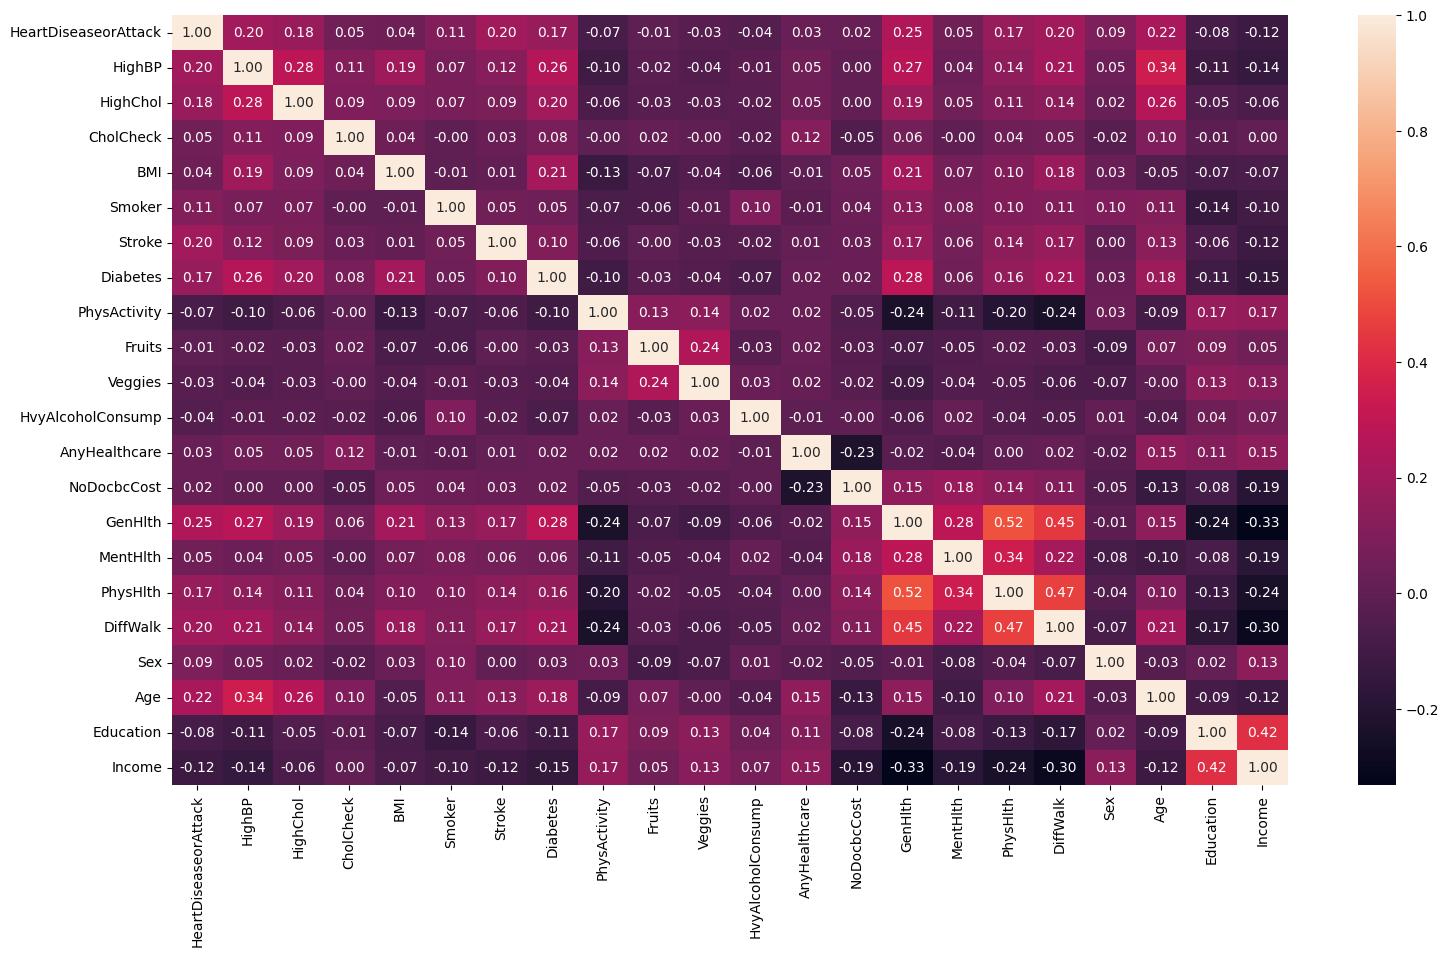

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(corr,fmt=".2f",annot=True)

In [ ]:
x=df.drop('HeartDiseaseorAttack',axis=1)
y=df['HeartDiseaseorAttack']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[40789   480]
 [ 4145   543]]


Confusion Matrix:
[[40789   480]
 [ 4145   543]]


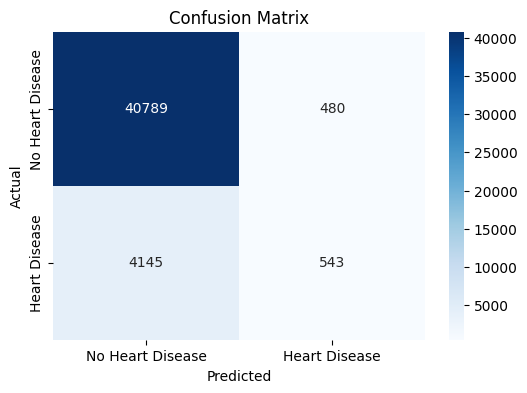

In [ ]:
# 6. Evaluate the model
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)
# 7.Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     41269
           1       0.53      0.12      0.19      4688

    accuracy                           0.90     45957
   macro avg       0.72      0.55      0.57     45957
weighted avg       0.87      0.90      0.87     45957



/tmp/ipython-input-209-1374661238.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Smoker'])


<Axes: xlabel='Smoker', ylabel='Density'>

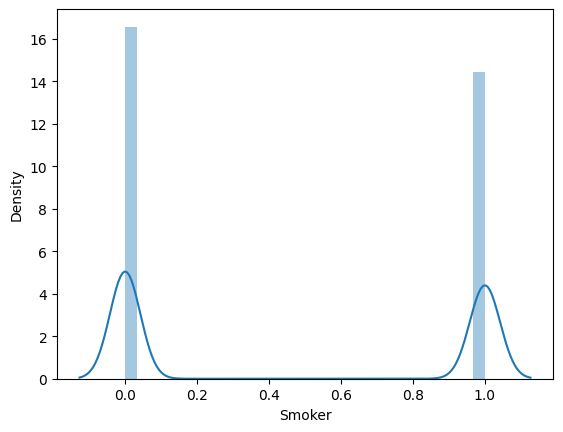

In [ ]:
sns.distplot(df['Smoker'])

/tmp/ipython-input-210-3893846595.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])
/tmp/ipython-input-210-3893846595.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
/tmp/ipython-input-210-3893846595.py:7: UserWarning: 

`distplot` is a deprecated function and will be

<Axes: xlabel='PhysHlth', ylabel='Density'>

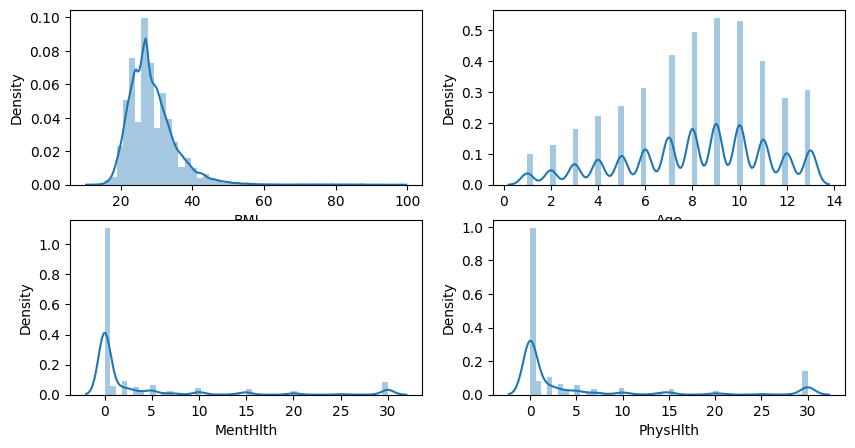

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df['BMI'])
plt.subplot(2,2,2)
sns.distplot(df['Age'])
plt.subplot(2,2,3)
sns.distplot(df['MentHlth'])
plt.subplot(2,2,4)
sns.distplot(df['PhysHlth'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('HeartDiseaseorAttack',axis=1),df['HeartDiseaseorAttack'],test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(183824, 21)
(45957, 21)


In [ ]:
df.shape

(229781, 22)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit the scaler
scaler.fit(x_train)
# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
scaler.mean_

array([ 0.45354252,  0.44199343,  0.95954282, 28.67352468,  0.46510249,
        0.04486901,  0.32361933,  0.73366916,  0.61358691,  0.79479829,
        0.06087344,  0.94641614,  0.09270824,  2.60053638,  3.51220733,
        4.66029463,  0.18529137,  0.43911024,  8.08301963,  4.98178149,
        5.89223932])

In [ ]:
scaler.var_

array([2.47841702e-01, 2.46635238e-01, 3.88203933e-02, 4.60560694e+01,
       2.48782164e-01, 4.28557775e-02, 5.22267003e-01, 1.95398723e-01,
       2.37098014e-01, 1.63093971e-01, 5.71678680e-02, 5.07126325e-02,
       8.41134244e-02, 1.13050520e+00, 5.96419978e+01, 8.15636628e+01,
       1.50958475e-01, 2.46292437e-01, 9.57597505e+00, 9.84267485e-01,
       4.37112874e+00])

In [ ]:
x_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
115369,0,1,0,24,1,0,0,1,1,1,...,1,0,1,2,0,0,0,6,6,8
145209,0,0,1,29,1,0,0,1,1,1,...,0,1,3,2,3,0,0,2,5,4
241128,0,0,1,28,0,0,2,0,1,0,...,1,0,3,0,0,1,1,12,4,4
72372,1,0,1,32,1,1,0,0,1,1,...,1,0,2,0,0,0,1,10,4,5
236231,0,1,1,37,0,0,0,0,0,1,...,1,0,3,10,0,0,0,7,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193286,1,1,1,20,1,0,0,1,0,1,...,1,0,3,15,1,0,1,8,5,6
126789,1,0,0,49,1,0,0,0,0,0,...,1,0,4,2,10,0,1,8,3,4
189541,0,0,1,23,1,0,0,1,1,1,...,1,0,1,0,0,0,0,8,6,4
45451,0,0,1,32,0,0,0,0,1,0,...,1,0,2,0,0,0,1,6,5,8


In [ ]:
x_train_scaled

array([[-0.91102609,  1.12360005, -4.87006095, ..., -0.67313451,
         1.02632385,  1.00814848],
       [-0.91102609, -0.8899964 ,  0.20533624, ..., -1.96574742,
         0.01836354, -0.90506394],
       [-0.91102609, -0.8899964 ,  0.20533624, ...,  1.26578485,
        -0.98959677, -0.90506394],
       ...,
       [-0.91102609, -0.8899964 ,  0.20533624, ..., -0.02682806,
         1.02632385, -0.90506394],
       [-0.91102609, -0.8899964 ,  0.20533624, ..., -0.67313451,
         0.01836354,  1.00814848],
       [-0.91102609, -0.8899964 ,  0.20533624, ..., -1.6425942 ,
        -1.99755708,  0.05154227]])

In [ ]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [ ]:
x_train_scaled

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,-0.911026,1.123600,-4.870061,-0.688654,1.072410,-0.216741,-0.447804,0.602505,0.793575,0.508115,...,0.237945,-0.319658,-1.505322,-0.195810,-0.516018,-0.476899,-0.884806,-0.673135,1.026324,1.008148
1,-0.911026,-0.889996,0.205336,0.048107,1.072410,-0.216741,-0.447804,0.602505,0.793575,0.508115,...,-4.202658,3.128343,0.375700,-0.195810,-0.183839,-0.476899,-0.884806,-1.965747,0.018364,-0.905064
2,-0.911026,-0.889996,0.205336,-0.099245,-0.932479,-0.216741,2.319671,-1.659737,0.793575,-1.968058,...,0.237945,-0.319658,0.375700,-0.454783,-0.516018,2.096880,1.130191,1.265785,-0.989597,-0.905064
3,1.097663,-0.889996,0.205336,0.490163,1.072410,4.613795,-0.447804,-1.659737,0.793575,0.508115,...,0.237945,-0.319658,-0.564811,-0.454783,-0.516018,-0.476899,1.130191,0.619478,-0.989597,-0.426761
4,-0.911026,1.123600,0.205336,1.226924,-0.932479,-0.216741,-0.447804,-1.659737,-1.260121,0.508115,...,0.237945,-0.319658,0.375700,0.840080,-0.516018,-0.476899,-0.884806,-0.349981,1.026324,1.008148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183819,1.097663,1.123600,0.205336,-1.278063,1.072410,-0.216741,-0.447804,0.602505,-1.260121,0.508115,...,0.237945,-0.319658,0.375700,1.487512,-0.405292,-0.476899,1.130191,-0.026828,0.018364,0.051542
183820,1.097663,-0.889996,-4.870061,2.995150,1.072410,-0.216741,-0.447804,-1.659737,-1.260121,-1.968058,...,0.237945,-0.319658,1.316210,-0.195810,0.591247,-0.476899,1.130191,-0.026828,-1.997557,-0.905064
183821,-0.911026,-0.889996,0.205336,-0.836006,1.072410,-0.216741,-0.447804,0.602505,0.793575,0.508115,...,0.237945,-0.319658,-1.505322,-0.454783,-0.516018,-0.476899,-0.884806,-0.026828,1.026324,-0.905064
183822,-0.911026,-0.889996,0.205336,0.490163,-0.932479,-0.216741,-0.447804,-1.659737,0.793575,-1.968058,...,0.237945,-0.319658,-0.564811,-0.454783,-0.516018,-0.476899,1.130191,-0.673135,0.018364,1.008148


In [ ]:
np.round(x_train_scaled.describe())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0,...,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0,183824.0
mean,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-5.0,-2.0,-1.0,-0.0,-0.0,-2.0,-1.0,-2.0,...,-4.0,-0.0,-2.0,-0.0,-1.0,-0.0,-1.0,-2.0,-4.0,-2.0
25%,-1.0,-1.0,0.0,-1.0,-1.0,-0.0,-0.0,-2.0,-1.0,1.0,...,0.0,-0.0,-1.0,-0.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0
50%,-1.0,-1.0,0.0,-0.0,-1.0,-0.0,-0.0,1.0,1.0,1.0,...,0.0,-0.0,0.0,-0.0,-1.0,-0.0,-1.0,-0.0,0.0,0.0
75%,1.0,1.0,0.0,0.0,1.0,-0.0,-0.0,1.0,1.0,1.0,...,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,0.0,10.0,1.0,5.0,2.0,1.0,1.0,1.0,...,0.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0


In [ ]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8951628696390104
Scaled 0.8963161215919229


#  model deploymnet on the server

In [ ]:
# from flask import Flask

In [ ]:
# app=Flask(__name__)


# @app.route('/')
# def hello_world():
#   return "hellow world!"

In [ ]:
# if __name__=='__main__':
#   app.run()

In [ ]:
# from flask import Flask
# from pyngrok import ngrok

# # Set your authtoken (replace with your real one)
# ngrok.set_auth_token("1h2vFfS23AbCdEfGhIjKlMnOpQrStUvWxYz")

# app = Flask(__name__)

# @app.route("/")
# def home():
#     return "<h1>Hello from Flask with Ngrok!</h1>"

# port = 5000
# public_url = ngrok.connect(port)
# print(" * Ngrok Tunnel URL:", public_url)

# app.run(port=port)

In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
# sbf_sel = SequentialFeatureSelector(RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=0),
#                                    k_features=3, # number of features to select
#                                    forward=False, # False for backward feature selection
#                                    floating=False,
#                                    scoring='roc_auc',
#                                    cv=3,
#                                    n_jobs=-1)

# sbf_sel = sbf_sel.fit(x, y)

In [ ]:
# selected = data_rf.columns[list(sff_sel.k_feature_idx_)] # top 3 features
# selected

# Feature selection using F regression

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
X=df.drop('HeartDiseaseorAttack',axis=1)
y=df['HeartDiseaseorAttack']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print p-values
print("\nP-values of each feature:")
print(model.pvalues)

# Filter features with p-value < 0.05
significant_features = model.pvalues[model.pvalues < 0.05].index
significant_features = significant_features.drop('const', errors='ignore')  # Remove constant if present

print("\nSignificant features based on p-value < 0.05:")
print(significant_features)

# Final DataFrame with selected features
X_selected = X[significant_features]

print("\nSelected X shape:", X_selected.shape)



P-values of each feature:
HighBP               2.615426e-179
HighChol             9.041630e-255
CholCheck             1.515998e-10
BMI                  3.780292e-159
Smoker                1.022023e-63
Stroke                0.000000e+00
Diabetes             2.948984e-171
PhysActivity          2.796243e-01
Fruits                7.105690e-02
Veggies               9.788411e-01
HvyAlcoholConsump     6.745268e-20
AnyHealthcare         2.898368e-07
NoDocbcCost           6.839091e-01
GenHlth               0.000000e+00
MentHlth              7.165526e-04
PhysHlth              7.587363e-36
DiffWalk             1.307575e-162
Sex                   0.000000e+00
Age                   0.000000e+00
Education             2.131889e-24
Income                2.087777e-41
dtype: float64

Significant features based on p-value < 0.05:
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWal



```

```

# Lasso for Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

model = Lasso(alpha=0.01)
model.fit(X, y)

selected_cols = X.columns[model.coef_ != 0]
print("Selected features via Lasso:", selected_cols)


Selected features via Lasso: Index(['HighBP', 'HighChol', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth',
       'Sex', 'Age', 'Income'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

X =df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

# 1. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. LassoCV with 5-fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_scaled, y)

# 3. Output the best alpha
print(f"✅ Best alpha: {lasso_cv.alpha_:.5f}")

# 4. Coefficients
coef = pd.Series(lasso_cv.coef_, index=X.columns)
print("\n📊 Feature Coefficients:")
print(coef)

# 5. Features selected (non-zero coefficients)
selected_features = coef[coef != 0].index
print(f"\n✅ Selected features ({len(selected_features)}): {list(selected_features)}")


✅ Best alpha: 0.00007

📊 Feature Coefficients:
HighBP               0.017122
HighChol             0.020636
CholCheck            0.002868
BMI                 -0.007822
Smoker               0.012019
Stroke               0.038278
Diabetes             0.016091
PhysActivity         0.001783
Fruits               0.001979
Veggies              0.001772
HvyAlcoholConsump   -0.004854
AnyHealthcare        0.001541
NoDocbcCost          0.002370
GenHlth              0.036160
MentHlth            -0.001078
PhysHlth             0.007814
DiffWalk             0.018438
Sex                  0.028941
Age                  0.037089
Education            0.001426
Income              -0.007134
dtype: float64

✅ Selected features (21): ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


# Feature Importance with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 5 features
top_features = X.columns[indices[:8]]
print("Top 5 important features:", top_features)


Top 5 important features: Index(['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth',
       'Fruits'],
      dtype='object')


# Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

selected_cols = X.columns[rfe.support_]
print("Selected features with RFE:", selected_cols)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected features with RFE: Index(['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'DiffWalk'], dtype='object')


# SelectKBest (Filter)



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_cols = X.columns[selector.get_support()]
print("Top 5 selected features:", selected_cols)


Top 5 selected features: Index(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')


# using forward and backword selection

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd

X =df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model
lr = LogisticRegression()


In [ ]:
# Forward selection: start with 0 features and add
sfs = SFS(lr,
          k_features=5,
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)

sfs = sfs.fit(X_train, y_train)

# Selected feature names
selected_forward = list(sfs.k_feature_names_)
print("✅ Forward Selection (SFS) Features:", selected_forward)


✅ Forward Selection (SFS) Features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker']


In [ ]:
# Backward selection: start with all features and remove
sbs = SFS(lr,
          k_features=5,
          forward=False,
          floating=False,
          scoring='r2',
          cv=5)

sbs = sbs.fit(X_train, y_train)

# Selected feature names
selected_backward = list(sbs.k_feature_names_)
print("✅ Backward Selection (SBS) Features:", selected_backward)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print("SFS CV Score:", sfs.k_score_)
print("SBS CV Score:", sbs.k_score_)


SFS CV Score: -0.11547073636942891


NameError: name 'sbs' is not defined